In [328]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
file_name = "analysis_df.csv"
df_raw = pd.read_csv(file_name)
start_year=1994
end_year=2022
df_raw.columns

Index(['Unnamed: 0', 'year_month_x', 'monthly_sunshine',
       'temperature_monthly_mean', 'humidity_monthly_mean', 'month_index',
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'year_month_y', 'monthly_rainfall', 'year_period_month_x_x',
       'total_humidity_morning', 'year_period_month_y_x',
       'total_humidity_afternoon', 'year_period_month_x_y',
       'total_temperature_morning', 'year_period_month_y_y',
       'total_temperature_afternoon'],
      dtype='object')

In [329]:
df = df_raw[["year_month_x", 
             "monthly_sunshine",
             "temperature_monthly_mean",
             "humidity_monthly_mean",
             "month_index",
             "January",
             "February",
             "March",
             "April",
             "May",
             "June",
             "July",
             "August",
             "September",
             "October",
             "November",
             "December",
             "monthly_rainfall",
             "total_humidity_morning",
             "total_humidity_afternoon",
             "total_temperature_morning",
             "total_temperature_afternoon"]]
df.rename(columns={"year_month_x": "year_month",
                   "temperature_monthly_mean": "mean_monthly_shade_temperature",
                   "humidity_monthly_mean": "mean_monthly_humidity",
                   "monthly_rainfall": "mean_monthly_rainfall",
                   "total_humidity_morning": "mean_monthly_morning_humidity",
                   "total_humidity_afternoon": "mean_monthly_afternoon_humidity",
                   "total_temperature_morning": "mean_monthly_min_shade_temperature",
                   "total_temperature_afternoon": "mean_monthly_max_shade_temperature",
                   "monthly_sunshine": "mean_monthly_sunshine"}, inplace=True)
df.columns

C:\Users\simeo\AppData\Local\Temp\ipykernel_19472\3102863636.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"year_month_x": "year_month",


Index(['year_month', 'mean_monthly_sunshine', 'mean_monthly_shade_temperature',
       'mean_monthly_humidity', 'month_index', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'mean_monthly_rainfall',
       'mean_monthly_morning_humidity', 'mean_monthly_afternoon_humidity',
       'mean_monthly_min_shade_temperature',
       'mean_monthly_max_shade_temperature'],
      dtype='object')

In [330]:
#df = df.drop(df[df["mean_monthly_min_shade_temperature" == 0]].index)
df.drop(df[df["mean_monthly_min_shade_temperature"] == 0].index, inplace=True)
df.head()

C:\Users\simeo\AppData\Local\Temp\ipykernel_19472\1291893022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["mean_monthly_min_shade_temperature"] == 0].index, inplace=True)


,year_month,mean_monthly_sunshine,mean_monthly_shade_temperature,mean_monthly_humidity,month_index,January,February,March,April,May,...,August,September,October,November,December,mean_monthly_rainfall,mean_monthly_morning_humidity,mean_monthly_afternoon_humidity,mean_monthly_min_shade_temperature,mean_monthly_max_shade_temperature
0,1994_00,6.5,29.00,78.5,0,1,0,0,0,0,...,0,0,0,0,0,260.0,82.0,75.0,28.8,28.8
1,1994_01,6.4,28.85,71.0,1,0,1,0,0,0,...,0,0,0,0,0,103.2,74.0,68.0,28.5,28.5
2,1994_02,6.6,28.75,78.5,2,0,0,1,0,0,...,0,0,0,0,0,173.3,79.0,78.0,28.7,28.7
3,1994_03,7.2,29.50,76.0,3,0,0,0,1,0,...,0,0,0,0,0,61.2,78.0,74.0,29.6,29.6
4,1994_04,5.5,29.85,78.0,4,0,0,0,0,1,...,0,0,0,0,0,318.7,81.0,75.0,29.8,29.8


In [349]:
df.shape

(345, 22)

In [331]:
df.to_csv("final_data.csv")

In [332]:
df.dtypes

year_month                             object
mean_monthly_sunshine                 float64
mean_monthly_shade_temperature        float64
mean_monthly_humidity                 float64
month_index                             int64
January                                 int64
February                                int64
March                                   int64
April                                   int64
May                                     int64
June                                    int64
July                                    int64
August                                  int64
September                               int64
October                                 int64
November                                int64
December                                int64
mean_monthly_rainfall                 float64
mean_monthly_morning_humidity         float64
mean_monthly_afternoon_humidity       float64
mean_monthly_min_shade_temperature    float64
mean_monthly_max_shade_temperature

In [333]:
#sns.lmplot(data=df, x="year_month", y="mean_monthly_rainfall", height=6, aspect=2, fit_reg=True)

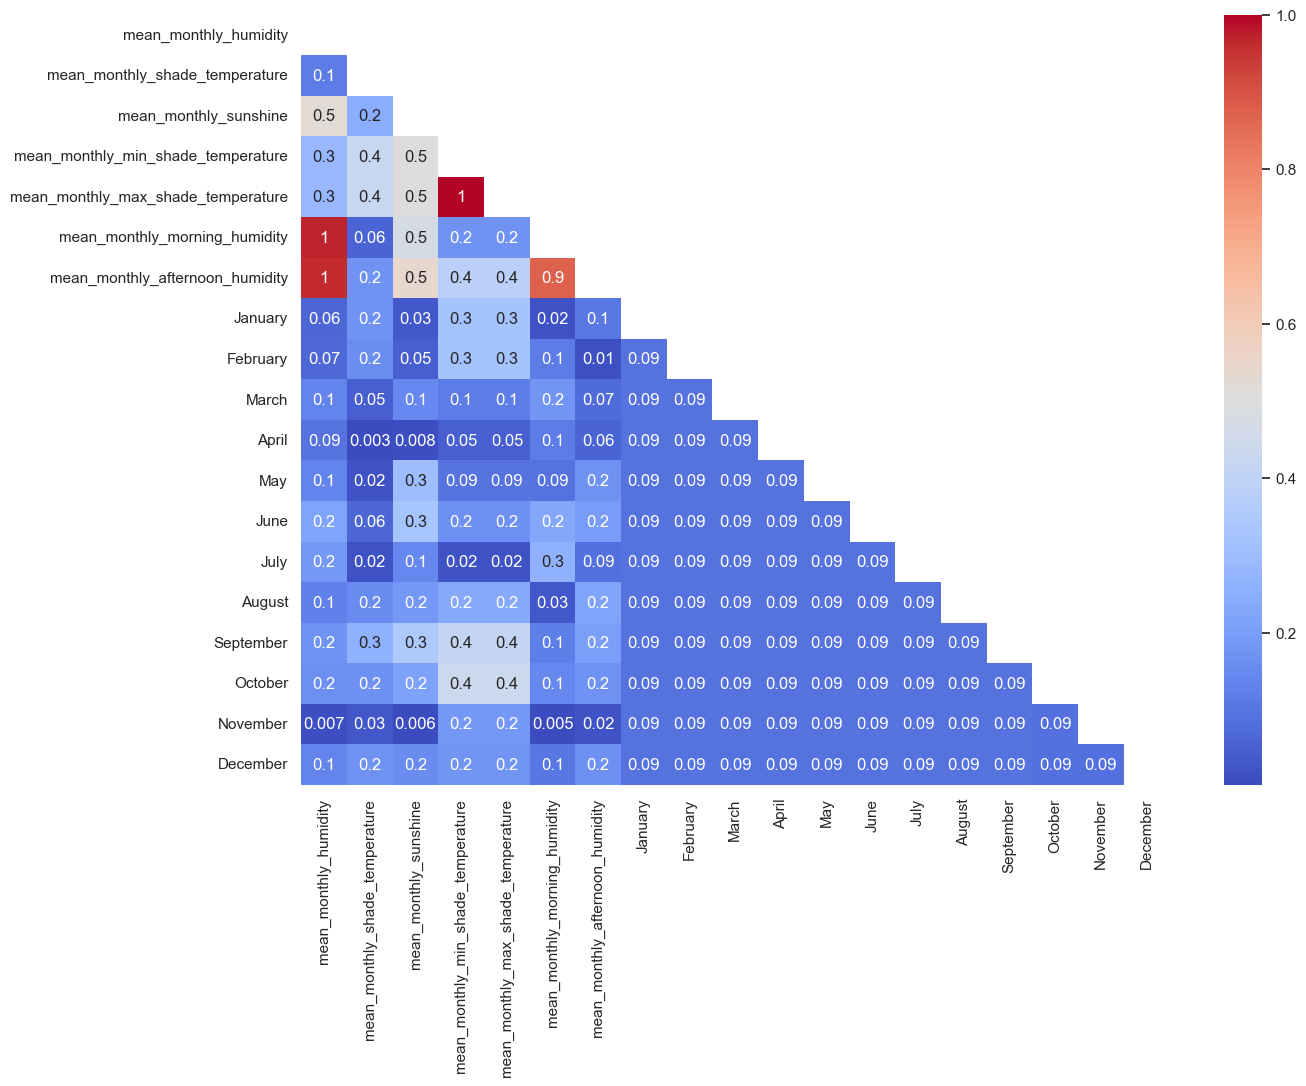

In [334]:
x_columns = [
    "mean_monthly_humidity",
    "mean_monthly_shade_temperature",
    "mean_monthly_sunshine",
    "mean_monthly_min_shade_temperature",
    "mean_monthly_max_shade_temperature",
    "mean_monthly_morning_humidity",
    "mean_monthly_afternoon_humidity",
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
y_column = "mean_monthly_rainfall"

plt.figure(figsize=(14, 10))
sns.set_theme(style="white")
analysis_df_corr = df[x_columns].corr().applymap(
    lambda x: abs(round(x, 3)))
# analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask,
                      annot=True, cmap="coolwarm", fmt='.1g')


Prelimary OLS Results

In [335]:
X = df[x_columns]
X = sm.add_constant(X)
y = df[y_column]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     mean_monthly_rainfall   R-squared:                       0.574
Model:                               OLS   Adj. R-squared:                  0.553
Method:                    Least Squares   F-statistic:                     27.60
Date:                   Sat, 22 Apr 2023   Prob (F-statistic):           2.88e-51
Time:                           16:33:14   Log-Likelihood:                -2074.0
No. Observations:                    345   AIC:                             4182.
Df Residuals:                        328   BIC:                             4247.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                900.6874    329.487      2.734      0.007     252.514    1548.861
mean_monthly_humidity                  0.8153      0.387      2.109      0.036       0.055       1.576
mean_monthly_shade_temperature         1.4666      3.799      0.386      0.700      -6.006       8.939
mean_monthly_sunshine                -63.8314      5.955    -10.718      0.000     -75.547     -52.116
mean_monthly_min_shade_temperature    -8.1106      5.746     -1.412      0.159     -19.414       3.193
mean_monthly_max_shade_temperature    -8.1106      5.746     -1.412      0.159     -19.414       3.193
mean_monthly_morning_humidity         -7.7491      2.339     -3.313      0.001     -12.351      -3.147
mean_monthly_afternoon_humidity        9.3797      2.562      3.662      0.000       4.341      14.419
January                               59.0346     26.234      2.250      0.025       7.427     110.643
February                               3.0650     25.470      0.120      0.904     -47.040      53.170
March                                 21.0670     30.151      0.699      0.485     -38.246      80.380
April                                 17.2584     31.675      0.545      0.586     -45.053      79.570
May                                   68.3695     33.522      2.040      0.042       2.425     134.314
June                                  90.8429     31.230      2.909      0.004      29.407     152.279
July                                 156.9474     33.438      4.694      0.000      91.168     222.727
August                               136.3080     37.860      3.600      0.000      61.828     210.788
September                            110.6762     43.149      2.565      0.011      25.793     195.559
October                               46.8275     44.549      1.051      0.294     -40.810     134.465
November                              85.1805     38.549      2.210      0.028       9.346     161.016
December                             105.1104     30.121      3.490      0.001      45.855     164.365
==============================================================================
Omnibus:                      207.583   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2292.404
Skew:                           2.317   Prob(JB):                         0.00
Kurtosis:                      14.747   Cond. No.                     3.53e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-33. This might indicate that there are
strong multicollinearity proble

In [347]:
#temp_df = df["month_index"].apply("")
#p = sns.displot(data=df, x="mean_monthly_rainfall", hue="month_index",kind="kde", height=5, aspect=1.5)
#p

In [348]:
#sns.displot(data=df, x="mean_monthly_rainfall", kind="kde")

In [338]:
#df[df["month_index"] == 0]
#monthly_means = df.groupby("month_index")["mean_monthly_rainfall"].mean()

Data Filtering by z-index

In [339]:

#90 = 1.645
#95 = 1.96
#99 = 2.58
def z_filtering(z):
    df_indices_to_remove = []
    for month_index in range(12):
        temp_zscores = pd.Series(np.abs(stats.zscore(df[df["month_index"]==month_index]["mean_monthly_rainfall"]))).to_frame()
        to_remove_indices = temp_zscores[temp_zscores["mean_monthly_rainfall"] > z]
        #to_remove_indices["index"] = to_remove_indices.index
        for i in to_remove_indices.index.to_list():
            df_indices_to_remove.append(i)
        #to_remove_indices.head()
    return df_indices_to_remove
df_indices_to_remove_90 = z_filtering(1.645)
df_indices_to_remove_95 = z_filtering(1.96)
df_indices_to_remove_99 = z_filtering(2.68)

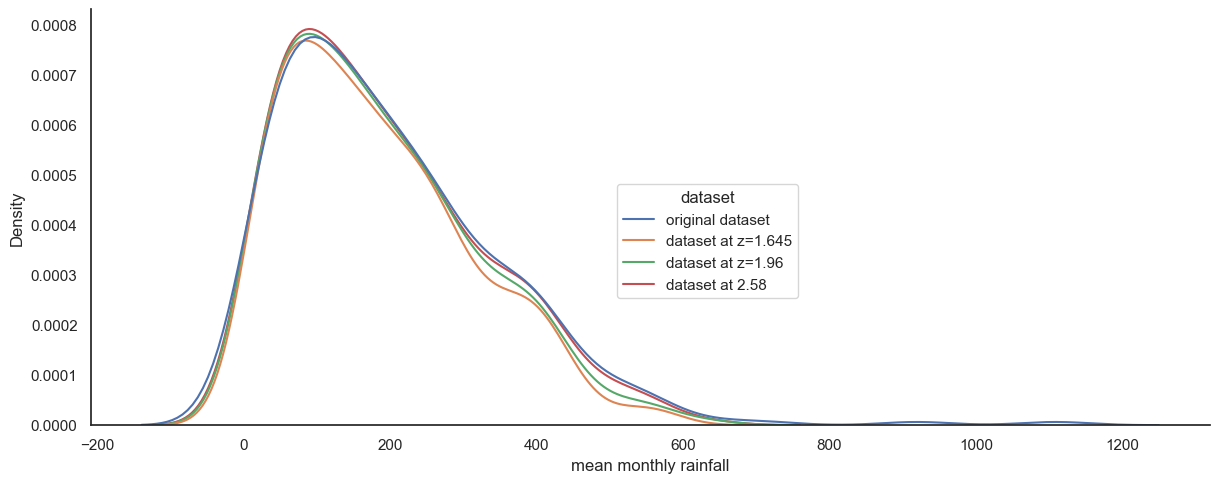

In [365]:
#90 = 1.645
#95 = 1.96
#99 = 2.58
df_90 = df.drop(df_indices_to_remove_90)
df_95 = df.drop(df_indices_to_remove_95)
df_99 = df.drop(df_indices_to_remove_99)
concatenated = pd.concat([df.assign(dataset='original dataset'), df_90.assign(dataset='dataset at z=1.645'), df_95.assign(dataset='dataset at z=1.96'), df_99.assign(dataset='dataset at 2.58')])
p =sns.displot(data=concatenated,x="mean_monthly_rainfall", hue="dataset", kind="kde", height=5, aspect=2.5)
p.set_xlabels("mean monthly rainfall")
sns.move_legend(p, "center", bbox_to_anchor=(.5,.5), frameon=True)

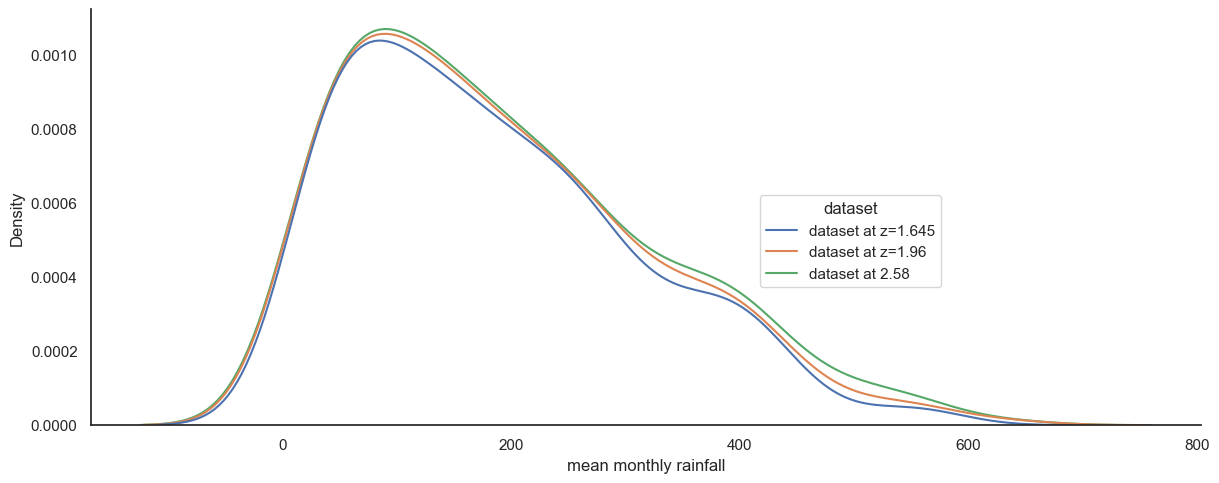

In [368]:
concatenated = pd.concat([df_90.assign(dataset='dataset at z=1.645'), df_95.assign(dataset='dataset at z=1.96'), df_99.assign(dataset='dataset at 2.58')])
p = sns.displot(data=concatenated,x="mean_monthly_rainfall", hue="dataset", kind="kde", height=5, aspect=2.5)
p.set_xlabels("mean monthly rainfall")
sns.move_legend(p, "center", bbox_to_anchor=(.6,.5), frameon=True)

In [342]:
#p = sns.displot(data=df_95, x="mean_monthly_rainfall", hue="month_index",kind="kde", height=5, aspect=1.5)
#p

Correlation Plot at z=90

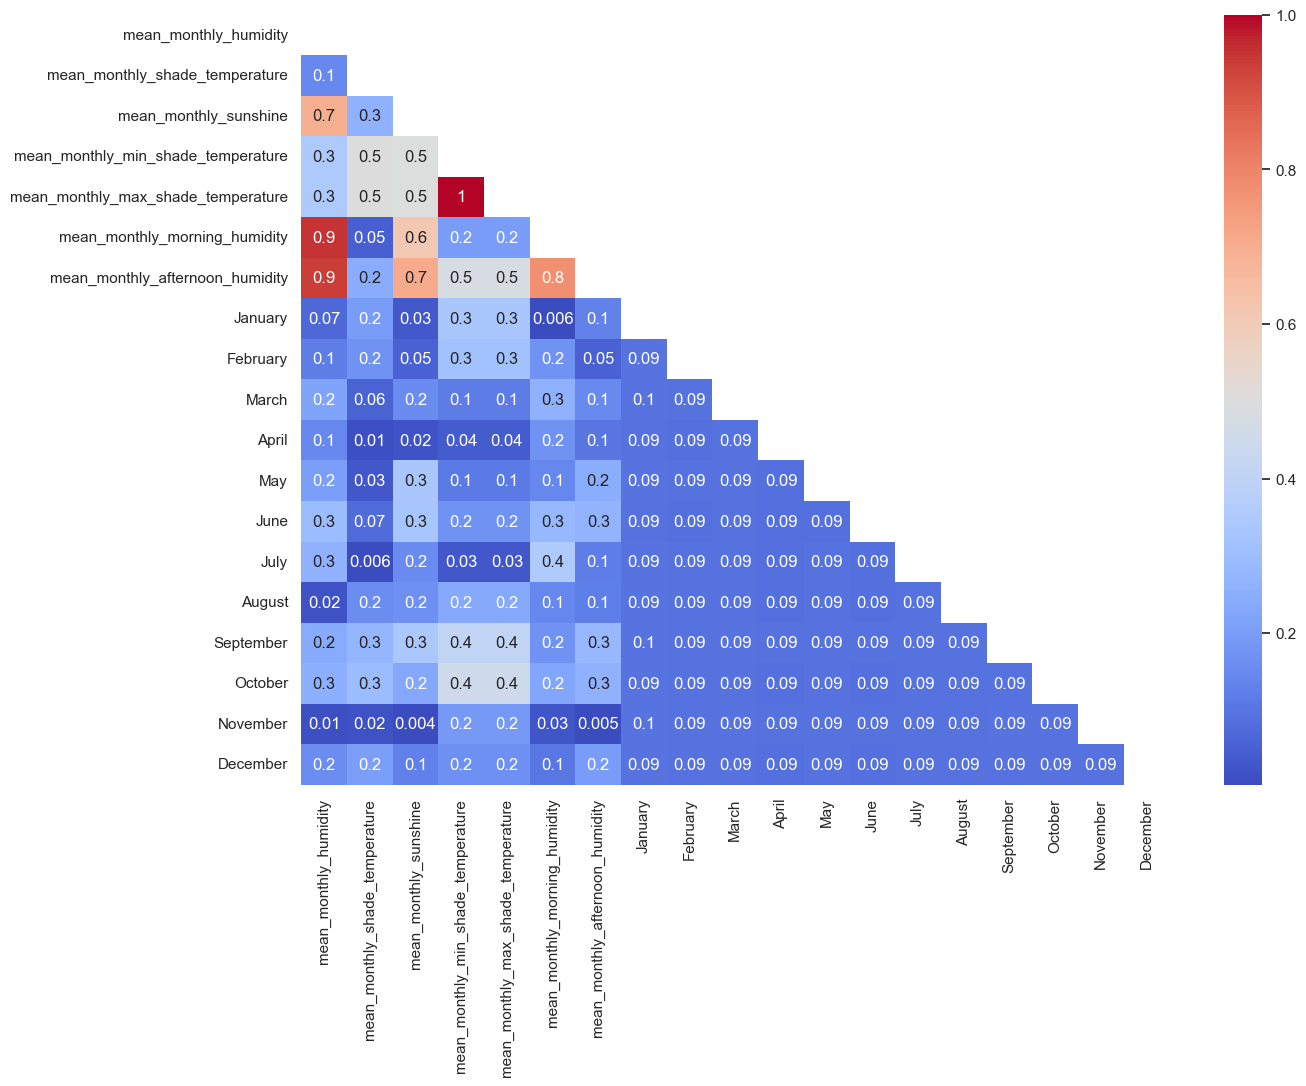

In [343]:
plt.figure(figsize=(14, 10))
sns.set_theme(style="white")
analysis_df_corr = df_90[x_columns].corr().applymap(
    lambda x: abs(round(x, 3)))
# analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask,
                      annot=True, cmap="coolwarm", fmt='.1g')

OLS at z=90

In [344]:
X = df_90[x_columns]
X = sm.add_constant(X)
y = df_90[y_column]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     mean_monthly_rainfall   R-squared:                       0.701
Model:                               OLS   Adj. R-squared:                  0.685
Method:                    Least Squares   F-statistic:                     43.66
Date:                   Sat, 22 Apr 2023   Prob (F-statistic):           2.49e-68
Time:                           16:33:18   Log-Likelihood:                -1777.8
No. Observations:                    315   AIC:                             3590.
Df Residuals:                        298   BIC:                             3653.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                298.9493    269.687      1.109      0.269    -231.783     829.682
mean_monthly_humidity                  2.3726      0.499      4.752      0.000       1.390       3.355
mean_monthly_shade_temperature         1.5885      3.264      0.487      0.627      -4.836       8.013
mean_monthly_sunshine                -37.4349      4.926     -7.600      0.000     -47.129     -27.741
mean_monthly_min_shade_temperature    -7.5260      4.303     -1.749      0.081     -15.995       0.943
mean_monthly_max_shade_temperature    -7.5260      4.303     -1.749      0.081     -15.995       0.943
mean_monthly_morning_humidity          0.1254      1.854      0.068      0.946      -3.522       3.773
mean_monthly_afternoon_humidity        4.6197      1.984      2.328      0.021       0.715       8.524
January                                7.4207     21.181      0.350      0.726     -34.262      49.103
February                             -41.6713     20.182     -2.065      0.040     -81.389      -1.954
March                                -32.9533     23.128     -1.425      0.155     -78.467      12.561
April                                -24.2438     24.809     -0.977      0.329     -73.067      24.580
May                                   68.0150     26.612      2.556      0.011      15.644     120.386
June                                  68.1181     25.540      2.667      0.008      17.857     118.380
July                                  89.5910     27.314      3.280      0.001      35.838     143.344
August                                35.5388     30.732      1.156      0.248     -24.941      96.018
September                             37.0788     33.126      1.119      0.264     -28.112     102.269
October                               -8.7574     34.515     -0.254      0.800     -76.681      59.166
November                              42.4861     29.851      1.423      0.156     -16.260     101.232
December                              58.3267     24.493      2.381      0.018      10.126     106.528
==============================================================================
Omnibus:                       30.718   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.039
Skew:                           0.639   Prob(JB):                     1.01e-10
Kurtosis:                       4.370   Cond. No.                     2.26e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-30. This might indicate that there are
strong multicollinearity proble

Correlation Plot at z=95

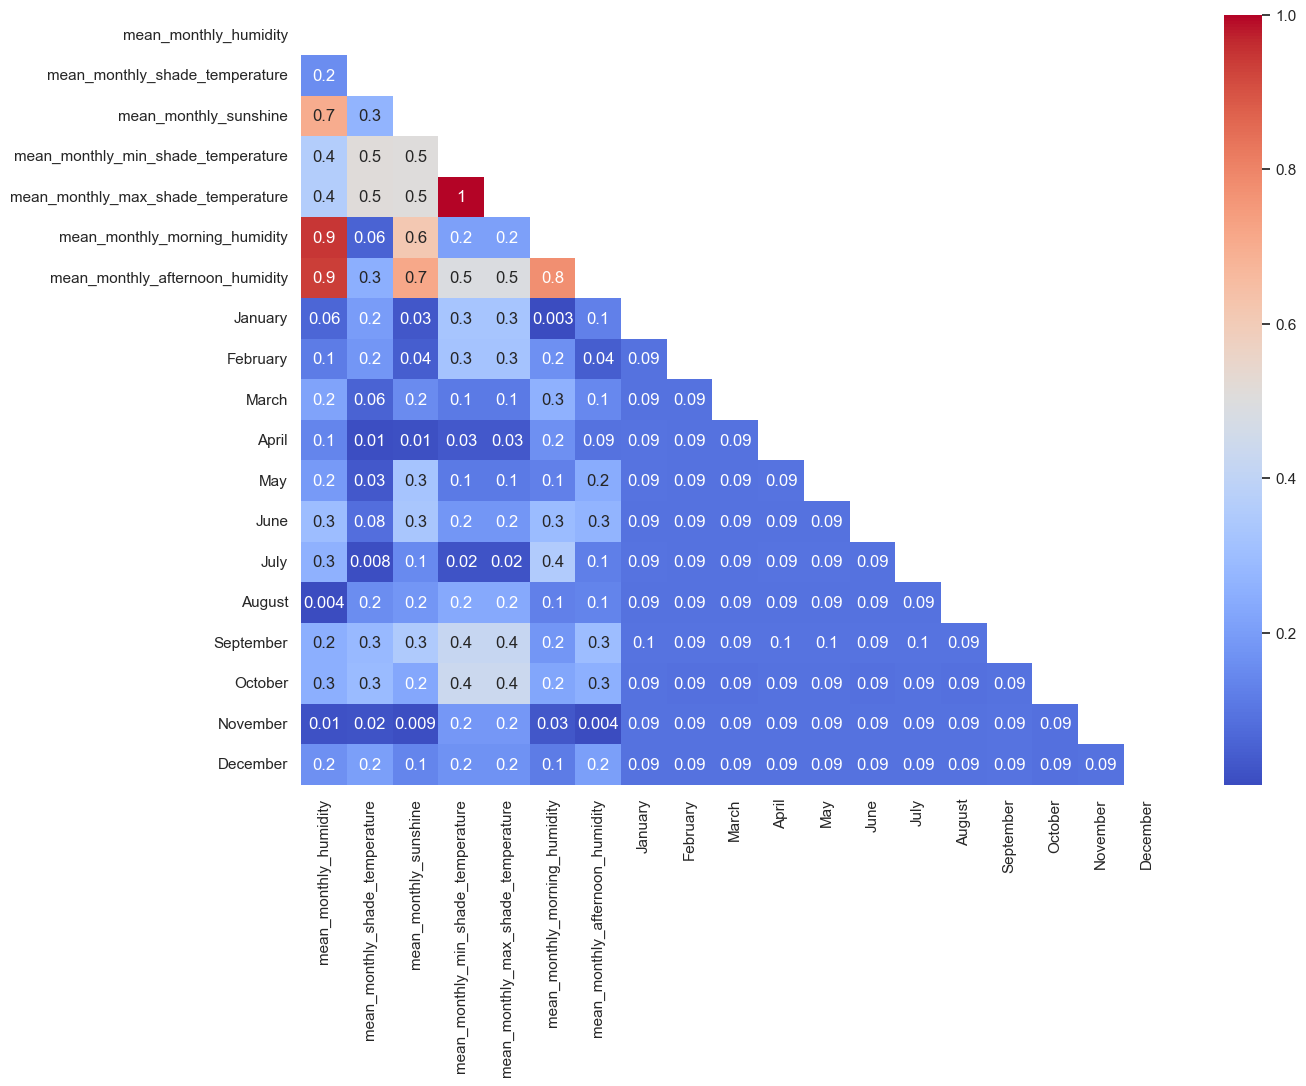

In [350]:
plt.figure(figsize=(14, 10))
sns.set_theme(style="white")
analysis_df_corr = df_95[x_columns].corr().applymap(
    lambda x: abs(round(x, 3)))
# analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask,
                      annot=True, cmap="coolwarm", fmt='.1g')

OLS at z=95

In [351]:
X = df_95[x_columns]
X = sm.add_constant(X)
y = df_95[y_column]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     mean_monthly_rainfall   R-squared:                       0.688
Model:                               OLS   Adj. R-squared:                  0.672
Method:                    Least Squares   F-statistic:                     42.93
Date:                   Sat, 22 Apr 2023   Prob (F-statistic):           5.82e-69
Time:                           19:15:33   Log-Likelihood:                -1877.4
No. Observations:                    329   AIC:                             3789.
Df Residuals:                        312   BIC:                             3853.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                217.5542    282.106      0.771      0.441    -337.518     772.626
mean_monthly_humidity                  2.5660      0.522      4.912      0.000       1.538       3.594
mean_monthly_shade_temperature         1.9793      3.466      0.571      0.568      -4.841       8.800
mean_monthly_sunshine                -42.0017      5.104     -8.229      0.000     -52.045     -31.958
mean_monthly_min_shade_temperature    -6.3095      4.466     -1.413      0.159     -15.098       2.479
mean_monthly_max_shade_temperature    -6.3095      4.466     -1.413      0.159     -15.098       2.479
mean_monthly_morning_humidity         -0.5976      1.926     -0.310      0.757      -4.387       3.192
mean_monthly_afternoon_humidity        5.7297      2.068      2.771      0.006       1.661       9.798
January                               -2.0453     22.327     -0.092      0.927     -45.976      41.885
February                             -43.1535     21.032     -2.052      0.041     -84.535      -1.772
March                                -38.5345     24.330     -1.584      0.114     -86.406       9.337
April                                -15.4411     25.922     -0.596      0.552     -66.444      35.562
May                                   51.3974     27.538      1.866      0.063      -2.786     105.580
June                                  50.6717     26.376      1.921      0.056      -1.226     102.569
July                                  79.0547     28.567      2.767      0.006      22.846     135.264
August                                29.6311     32.048      0.925      0.356     -33.426      92.689
September                             35.6784     34.650      1.030      0.304     -32.500     103.856
October                              -15.4433     36.103     -0.428      0.669     -86.479      55.593
November                              31.2163     31.264      0.998      0.319     -30.298      92.731
December                              54.5222     25.609      2.129      0.034       4.134     104.910
==============================================================================
Omnibus:                       29.062   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.930
Skew:                           0.617   Prob(JB):                     1.29e-09
Kurtosis:                       4.209   Cond. No.                     3.00e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.63e-31. This might indicate that there are
strong multicollinearity proble

Correlation Plot at z=99

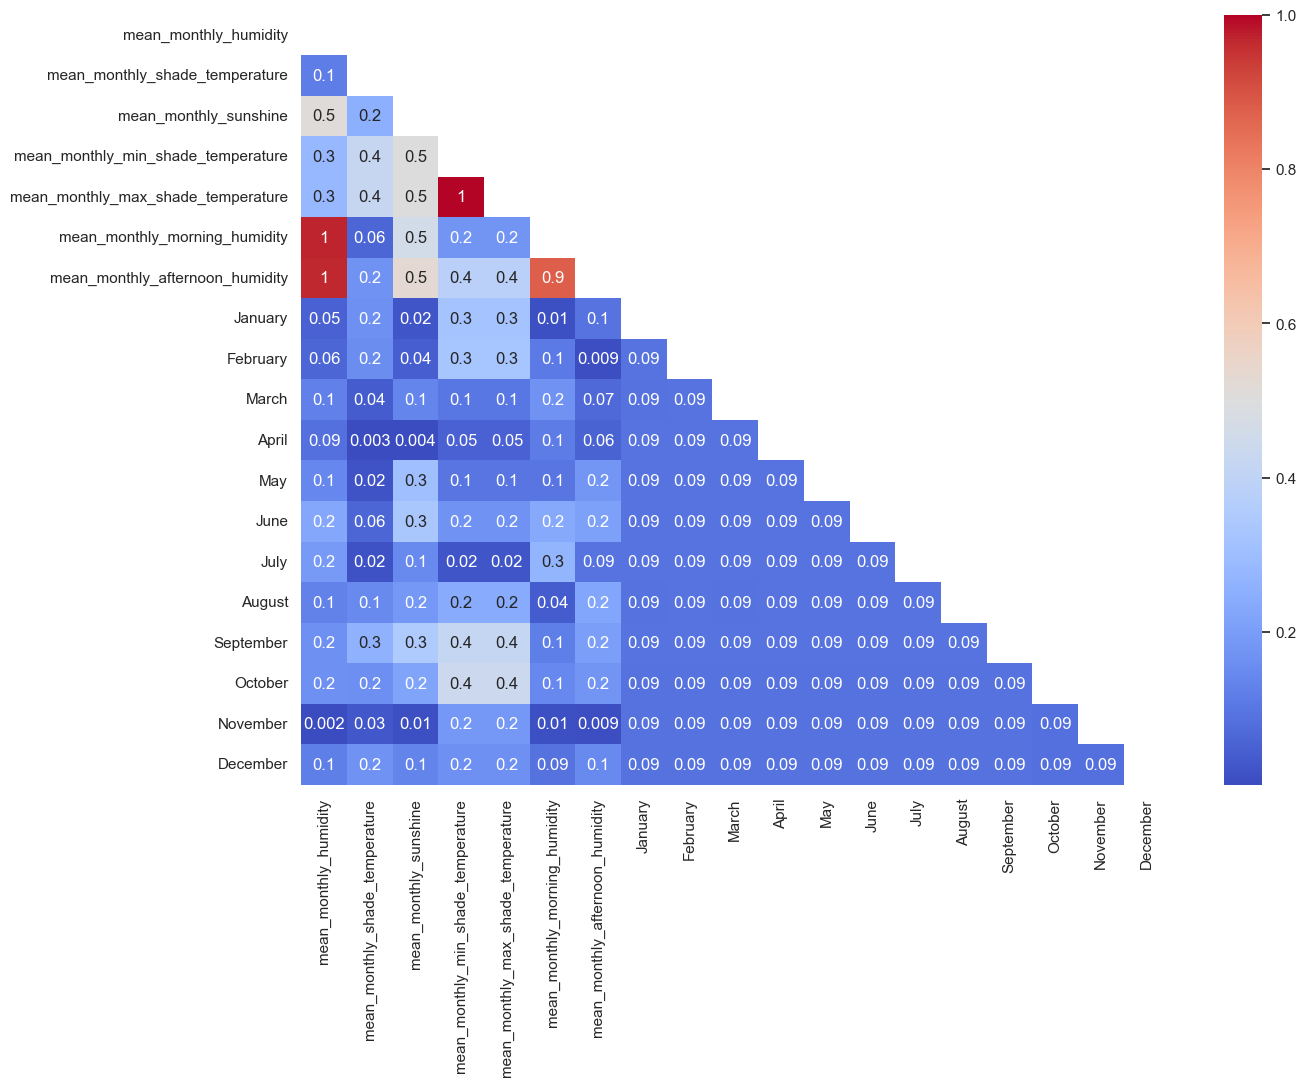

In [352]:
plt.figure(figsize=(14, 10))
sns.set_theme(style="white")
analysis_df_corr = df_99[x_columns].corr().applymap(
    lambda x: abs(round(x, 3)))
# analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask,
                      annot=True, cmap="coolwarm", fmt='.1g')

OLS at z=99

In [353]:
X = df_99[x_columns]
X = sm.add_constant(X)
y = df_99[y_column]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     mean_monthly_rainfall   R-squared:                       0.635
Model:                               OLS   Adj. R-squared:                  0.617
Method:                    Least Squares   F-statistic:                     35.01
Date:                   Sat, 22 Apr 2023   Prob (F-statistic):           9.59e-61
Time:                           19:33:44   Log-Likelihood:                -1971.3
No. Observations:                    339   AIC:                             3977.
Df Residuals:                        322   BIC:                             4042.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                837.2984    273.812      3.058      0.002     298.612    1375.985
mean_monthly_humidity                  0.4534      0.320      1.418      0.157      -0.176       1.083
mean_monthly_shade_temperature         1.3562      3.127      0.434      0.665      -4.795       7.508
mean_monthly_sunshine                -57.3624      4.970    -11.542      0.000     -67.140     -47.584
mean_monthly_min_shade_temperature    -6.7473      4.779     -1.412      0.159     -16.149       2.654
mean_monthly_max_shade_temperature    -6.7473      4.779     -1.412      0.159     -16.149       2.654
mean_monthly_morning_humidity         -5.6293      1.956     -2.878      0.004      -9.477      -1.782
mean_monthly_afternoon_humidity        6.5361      2.142      3.051      0.002       2.322      10.751
January                               43.0511     21.654      1.988      0.048       0.451      85.651
February                               9.6554     21.043      0.459      0.647     -31.744      51.055
March                                  2.1356     25.285      0.084      0.933     -47.609      51.880
April                                 20.2226     26.228      0.771      0.441     -31.376      71.822
May                                   85.4406     27.846      3.068      0.002      30.657     140.225
June                                 105.3210     25.919      4.063      0.000      54.329     156.313
July                                 157.0287     27.687      5.672      0.000     102.559     211.499
August                               111.5979     31.522      3.540      0.000      49.582     173.613
September                             91.7592     35.750      2.567      0.011      21.427     162.091
October                               30.6257     37.101      0.825      0.410     -42.364     103.616
November                              77.4941     32.001      2.422      0.016      14.538     140.451
December                             102.9666     25.114      4.100      0.000      53.558     152.376
==============================================================================
Omnibus:                       71.303   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.456
Skew:                           1.032   Prob(JB):                     4.34e-37
Kurtosis:                       5.755   Cond. No.                     1.84e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-30. This might indicate that there are
strong multicollinearity proble

In [56]:
x_columns_culled = [
    "mean_monthly_humidity",
    #"mean_monthly_shade_temperature",
    "mean_monthly_sunshine",
    "mean_monthly_min_shade_temperature",
    "mean_monthly_max_shade_temperature",
    #"mean_monthly_morning_humidity",
    #"mean_monthly_afternoon_humidity",
    #"January",
    "February",
    #"March",
    #"April",
    "May",
    "June",
    "July",
    "August",
    "September",
    #"October",
    "November",
    "December",
]
X = df_90[x_columns_culled]
X = sm.add_constant(X)
y = df_90[y_column]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     mean_monthly_rainfall   R-squared:                       0.695
Model:                               OLS   Adj. R-squared:                  0.684
Method:                    Least Squares   F-statistic:                     62.67
Date:                   Sun, 23 Apr 2023   Prob (F-statistic):           2.32e-71
Time:                           21:52:21   Log-Likelihood:                -1781.1
No. Observations:                    315   AIC:                             3586.
Df Residuals:                        303   BIC:                             3631.
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                341.5020    227.377      1.502      0.134    -105.936     788.940
mean_monthly_humidity                  7.4919      1.455      5.150      0.000       4.629      10.355
mean_monthly_sunshine                -36.7828      4.844     -7.594      0.000     -46.315     -27.251
mean_monthly_min_shade_temperature    -8.4892      3.006     -2.824      0.005     -14.405      -2.573
mean_monthly_max_shade_temperature    -8.4892      3.006     -2.824      0.005     -14.405      -2.573
February                             -28.9376     16.315     -1.774      0.077     -61.043       3.168
May                                   80.8961     17.237      4.693      0.000      46.977     114.816
June                                  75.3957     17.630      4.277      0.000      40.703     110.089
July                                  91.1066     16.847      5.408      0.000      57.954     124.259
August                                39.9898     16.617      2.407      0.017       7.291      72.689
September                             50.4073     16.862      2.989      0.003      17.226      83.588
November                              55.9948     15.980      3.504      0.001      24.548      87.441
December                              68.8914     16.191      4.255      0.000      37.030     100.752
==============================================================================
Omnibus:                       37.904   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.120
Skew:                           0.738   Prob(JB):                     8.81e-14
Kurtosis:                       4.550   Cond. No.                     7.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.97e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

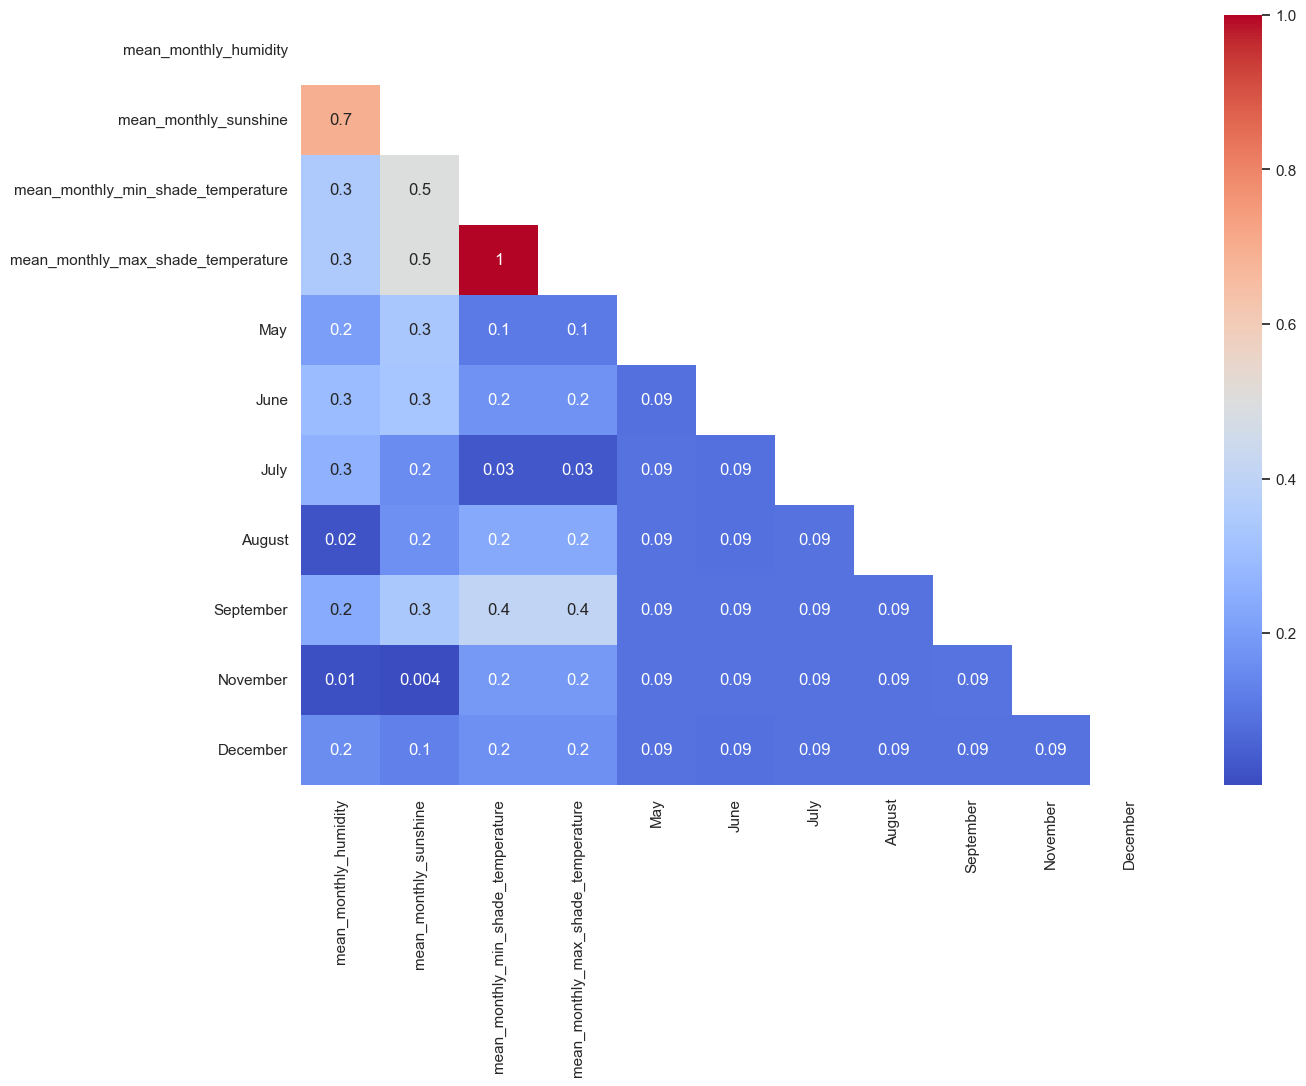

In [52]:
plt.figure(figsize=(14, 10))
sns.set_theme(style="white")
analysis_df_corr = df_90[x_columns_culled].corr().applymap(
    lambda x: abs(round(x, 3)))
# analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask,
                      annot=True, cmap="coolwarm", fmt='.1g')